In [1]:
import utils
import skimage
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def remove_noise(im: np.ndarray) -> np.ndarray:
    """
        A function that removes noise in the input image.
        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=bool)
        return:
            (np.ndarray) of shape (H, W). dtype=bool
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    
    # Structuring elements
    B_1 = skimage.morphology.disk(5) 
    B_2 = skimage.morphology.disk(3)
    # Closing
    im = skimage.morphology.binary_closing(im, footprint=B_1, out=im)
    # Erosion
    im = skimage.morphology.binary_erosion(im, footprint=B_1, out=im)
     # Opening
    im = skimage.morphology.binary_opening(im,footprint=B_2, out=im)
    # # # Dilation
    im = skimage.morphology.binary_dilation(im, footprint=B_2, out=im)
   
    return im
    ### END YOUR CODE HERE ### 

In [3]:
if __name__ == "__main__":
    # DO NOT CHANGE
    im = utils.read_image("noisy.png")

    binary_image = (im != 0)
    noise_free_image = remove_noise(binary_image)

    assert im.shape == noise_free_image.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, noise_free_image.shape)
    assert noise_free_image.dtype == bool, "Expected resulting image dtype to be bool. Was: {}".format(
            noise_free_image.dtype)

    noise_free_image = utils.to_uint8(noise_free_image)
    utils.save_im("noisy-filtered.png", noise_free_image)


Reading image: images\noisy.png
Saving image to: image_processed\noisy-filtered.png


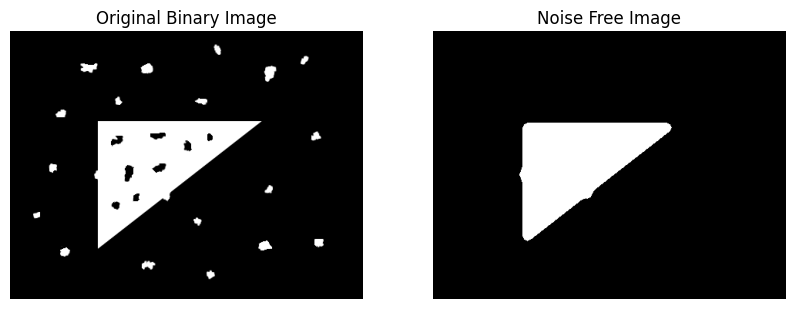

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original Binary Image')
axes[0].axis('off')
axes[1].imshow(noise_free_image, cmap='gray')
axes[1].set_title('Noise Free Image')
axes[1].axis('off')
plt.show()